In [1]:
import sys 
sys.path.append('/Users/patroklos/Desktop/delphi_')

import torch as ch
from torch import Tensor
from torch.distributions.multivariate_normal import MultivariateNormal
import matplotlib.pyplot as plt
import IPython 

from delphi.distributions.unknown_truncation_normal import TruncatedNormal
from delphi import oracle
from delphi.utils import constants as consts
from delphi.utils.helpers import setup_store_with_metadata
from cox.utils import Parameters

In [2]:
args = Parameters({ 
    'samples': 10000, 
    'batch_size': 10, 
    'iter_': 1, 
    'tol': 1e-1, 
    'lr': 1e-1
})

Synthetic Data Experiment for 1 Dimensional Censored Gaussian Distributions 

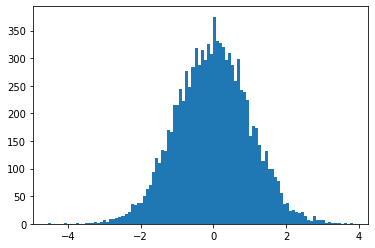

In [3]:
M = MultivariateNormal(ch.zeros(1), ch.ones(1, 1))
samples = M.sample([args.samples])

plt.hist(samples.flatten(), bins=100)
plt.show()

Truncate the Dataset

alpha: 0.4993


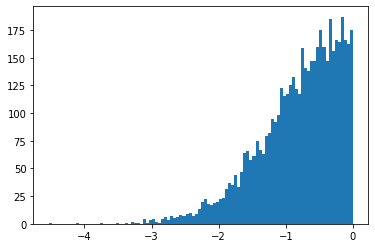

In [4]:
phi = oracle.Right(Tensor([0.0]))
indices = phi(samples).nonzero(as_tuple=False)[:,0]
S = samples[indices]
alpha = S.size(0) / samples.size(0)
print("alpha: {}".format(alpha))

plt.hist(S.flatten(), bins=100)
plt.show()

Run algorithm to Remove Bias from the Dataset

In [5]:
truncated = TruncatedNormal(alpha=alpha,
                           iter_=2)
truncated.fit(S)

Iteration 1 | Log Likelihood: 1.009
Iteration 2 | Log Likelihood: 0.91


In [6]:
print("estimated mean: ", truncated.loc)
print("estimated variance: ", truncated.variance)

estimated mean:  tensor([[-0.2915]], grad_fn=<MulBackward0>)
estimated variance:  tensor([[0.9420]], grad_fn=<CloneBackward0>)


In [13]:
truncated.truncated_normal.phi(Tensor([[1.0], [.5], [.25], [-1.5], [-.5], [.1], [-.1]]))

tensor([0., 0., 0., 1., 1., 0., 1.])